In [14]:
# Load libraries
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import urllib
from pathlib import Path
import os
import urllib
#import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

pd.options.display.max_columns = 50

In [6]:
relative_path = '/raw/train.csv'
train_path = '/raw/train.csv'

cur_wd = os.getcwd()

file_path = cur_wd + relative_path


In [7]:
def load_set_data(target_month, outlier_cutoff, income_cutoff, path):
    relative_path = path
    cur_wd = os.getcwd()
    file_path = cur_wd + relative_path

    if not Path(file_path).exists():
        print('Filepath does not exist in the "raw" folder. Check again')
        
    else:
        print('Loading and cleaning data.')

    d_types = {'ID': str, 'Customer_ID': str, 'Month': str, 'Name': str, 'Age': int, 'SSN': str, 'Occupation': str, 'Annual_Income': str, 'Monthly_Inhand_Salary': float, 'Num_Bank_Accounts': int, 'Num_Credit_Card': int, 'Interest_Rate': int, 'Num_of_Loan': int,'Type_of_Loan': str,
'Delay_from_due_date': int, 'Num_of_Delayed_Payment': int, 'Changed_Credit_Limit': float, 'Num_Credit_Inquiries': float, 'Credit_Mix': str, 'Outstanding_Debt': str, 'Credit_Utilization_Ratio': float, 'Credit_History_Age': float, 'Payment_of_Min_Amount': str, 'Total_EMI_per_month': float,
       'Amount_invested_monthly': float, 'Payment_Behaviour': str, 'Monthly_Balance':float, 'Credit_Score':str}


    df = pd.read_csv(file_path)
    
    # Data cleaning, type conversion and filtering DataFrame
    # remove underscores and convert 'Annual Income' column from string to float
    df['Annual_Income'] = df['Annual_Income'].str.replace('_', '').astype(float) 

    # filter out rows where 'Num_Credit_Inquiries' is blank and convert to integer
    df = df[df['Num_Credit_Inquiries'].notna()]
    df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(int)
    
    # filter out rows where 'Credit_Mix' has underscores
    df = df[~df['Credit_Mix'].str.contains('_')]

    # remove underscores and convert 'Outstanding_Debt' column from string to float
    df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '').astype(float)

    # no changes required for "Credit_Utilization_Ratio"

    # further filtering based on specific conditions
    df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '').astype(float)
    single_month_frame = df[df['Month'] ==  target_month]
    single_month_frame = single_month_frame[single_month_frame['Type_of_Loan'] !=  'Auto Loan']
    single_month_frame = single_month_frame[single_month_frame['Amount_invested_monthly'] < outlier_cutoff]
    single_month_frame = single_month_frame[single_month_frame['Annual_Income'] < income_cutoff]
    

    return single_month_frame

In [9]:
# checking data cleaning, type conversion and filtering DataFrame for April

# Load data for April with specified cutoffs
target_month = 'April'
outlier_cutoff = 10000
income_cutoff = 1000000
path = train_path

# Call the function to get the filtered DataFrame
april_data = load_set_data(target_month, outlier_cutoff, income_cutoff, path)

# Print the number of rows
print(f'Number of rows for {target_month}:', len(april_data))

Loading and cleaning data.


C:\Users\shiya\AppData\Local\Temp\ipykernel_31312\4217207163.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Number of rows for April: 8782


END OF CLEAN.

### Starting Deep Learning model

In [11]:
file_path_cs_class =  'raw/train.csv' 

pd_cs_class = pd.read_csv(file_path_cs_class)

C:\Users\shiya\AppData\Local\Temp\ipykernel_31312\391738695.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_cs_class = pd.read_csv(file_path_cs_class)


In [12]:
    # Data cleaning, type conversion and filtering DataFrame
# remove underscores and convert 'Annual Income' column from string to float
pd_cs_class['Annual_Income'] = pd_cs_class['Annual_Income'].str.replace('_', '').astype(float) 

# filter out rows where 'Num_Credit_Inquiries' is blank and convert to integer
pd_cs_class = pd_cs_class[pd_cs_class['Num_Credit_Inquiries'].notna()]
pd_cs_class['Num_Credit_Inquiries'] = pd_cs_class['Num_Credit_Inquiries'].astype(int)

# filter out rows where 'Credit_Mix' has underscores
pd_cs_class = pd_cs_class[~pd_cs_class['Credit_Mix'].str.contains('_')]

# remove underscores and convert 'Outstanding_Debt' column from string to float
pd_cs_class['Outstanding_Debt'] = pd_cs_class['Outstanding_Debt'].str.replace('_', '').astype(float)


pd_cs_class = pd_cs_class[pd_cs_class['Annual_Income'] < income_cutoff]

In [ ]:
pd_cs_class.head(10)

In [16]:
features = ['Annual_Income','Num_Credit_Inquiries','Outstanding_Debt','Annual_Income',
            'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 
            'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month' ]

scaler = MinMaxScaler()
pd_cs_class[features] = scaler.fit_transform(pd_cs_class[features])

In [17]:
df_X = pd_cs_class[features]

In [18]:
df_y = pd_cs_class['Credit_Score']
cs_mapping = {
    'Good': 3,
    'Standard':2,
    'Poor':1
}
df_y = df_y.map(cs_mapping)

In [19]:

x_train, x_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.3,random_state=42)

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.10.0
TensorFlow version: 2.10.0


In [21]:
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


In [22]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(4, input_dim=hl, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 284
Trainable params: 284
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
#hyper-parameters for optimizer
learning_rate = 0.1
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 5
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/5


c:\Users\shiya\miniconda3\envs\proj2_ml_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


5422/5423 [============================>.] - ETA: 0s - loss: 1.0123 - accuracy: 0.5310

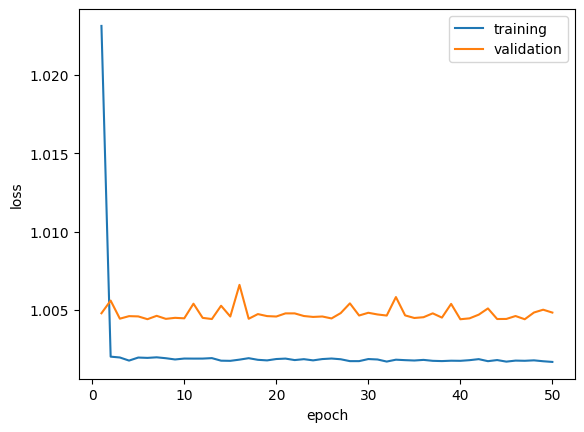

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [25]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[-0.39784408 -0.4962504  -0.26637256  0.11860316  0.43133128 -0.35832083
   0.37374762  0.04642121  0.08288898 -0.475403  ]
 [-0.2527326   0.3159513  -0.36232898  0.35723075  0.20638323 -0.06344533
   0.05603208 -0.45221072  0.3870526   0.12423861]
 [-0.32680845  0.18991591  0.50175446 -0.0538385  -0.30436218 -0.04791209
   0.06835122  0.06828778 -0.23142773  0.48725456]
 [ 0.20237601 -0.21935731 -0.35741007  0.3883292  -0.25512904 -0.27983147
  -0.17427333  0.2337804  -0.05477206  0.01701541]
 [        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [-0.13735884  0.465434    0.05137224  0.34059542 -0.33435154 -0.40595725
  -0.47023112 -0.29229382 -0.3473497  -0.24288262]
 [-0.05686325 -0.17021343 -0.07847405 -0.34189165 -0.3432688  -0.4445723
   0.47069606  0.3249938   0.02679604 -0.21297936]
 [ 0.5100114  -0.2519306   0.36695907  0.21271388  0.15151328 -0.48905975
  -0.32317513  0.19083697 -0.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks,  rotation=85)
plt.yticks(tick_marks, )
plt.xlabel("Predicted Score")
plt.ylabel("Actual Score")
plt.show()